# AWS SageMaker Training & Endpoints Ecosystem
* Notebook by Adam Lang
* Date: 3/6/2025

# Overview
* All of these components are part of the machine learning ecosystem on AWS SageMaker.
* This is an example of how to create a training job with deployment of a machine learning model to an AWS Sagemaker endpoint for inference.

1. S3 Buckets- Boto3 (sdk)
2. IAM Roles and Users
3. Complete Infrastructure of AWS Sagemaker-Training Jobs, Endpoints

In [1]:
## import dependencies
import sagemaker
from sklearn.model_selection import train_test_split
import boto3
import pandas as pd

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


When you are working with Sagemaker for deploying models you will mostly use the `boto3.client`

In [2]:
## boto3 client for sagemaker 
sm_boto3=boto3.client("sagemaker")

## setup sagemaker session
sess=sagemaker.Session()

## get the region name
region=sess.boto_session.region_name

## bucket name
bucket="adamnlpbucket1"
print(f"Using S3 bucket: {bucket}")


Using S3 bucket: adamnlpbucket1


In [3]:
print(region)

eu-central-1


# Load Dataset

In [18]:
df=pd.read_csv("mob_price_classification_train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# Exploratory Data Analysis

In [19]:
df.shape

(2000, 21)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [21]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [22]:
## check nulls
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [23]:
## value counts -- dependent variable
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

Summary
* Datset is equally balanced so no need to rebalance the target variable.

## Visualize the price_range

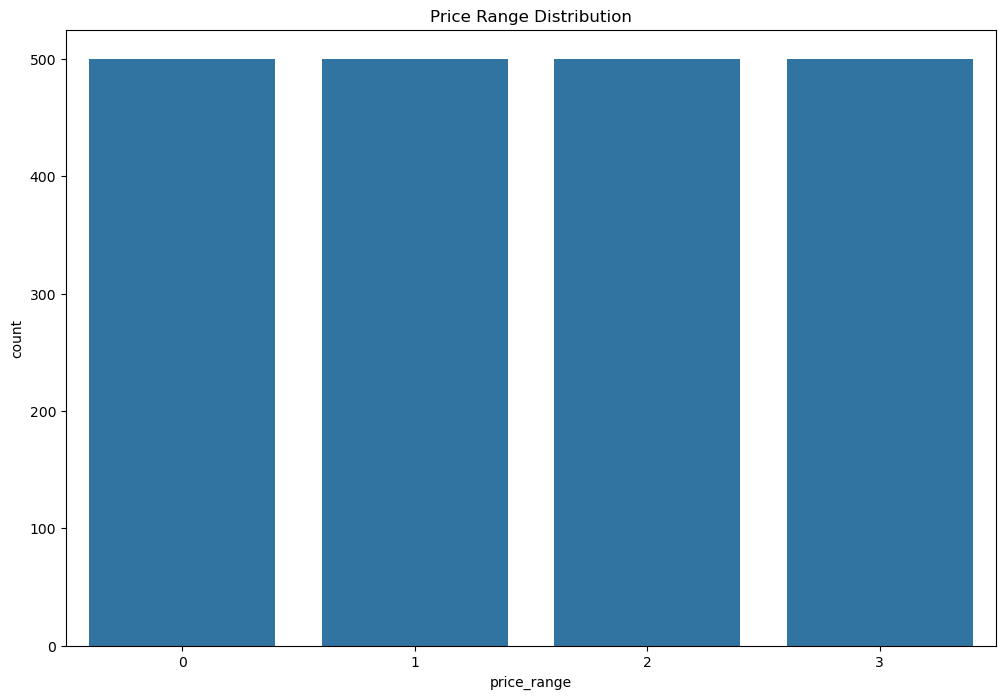

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(12,8))
sns.countplot(x='price_range',data=df).set_title('Price Range Distribution')
plt.show();

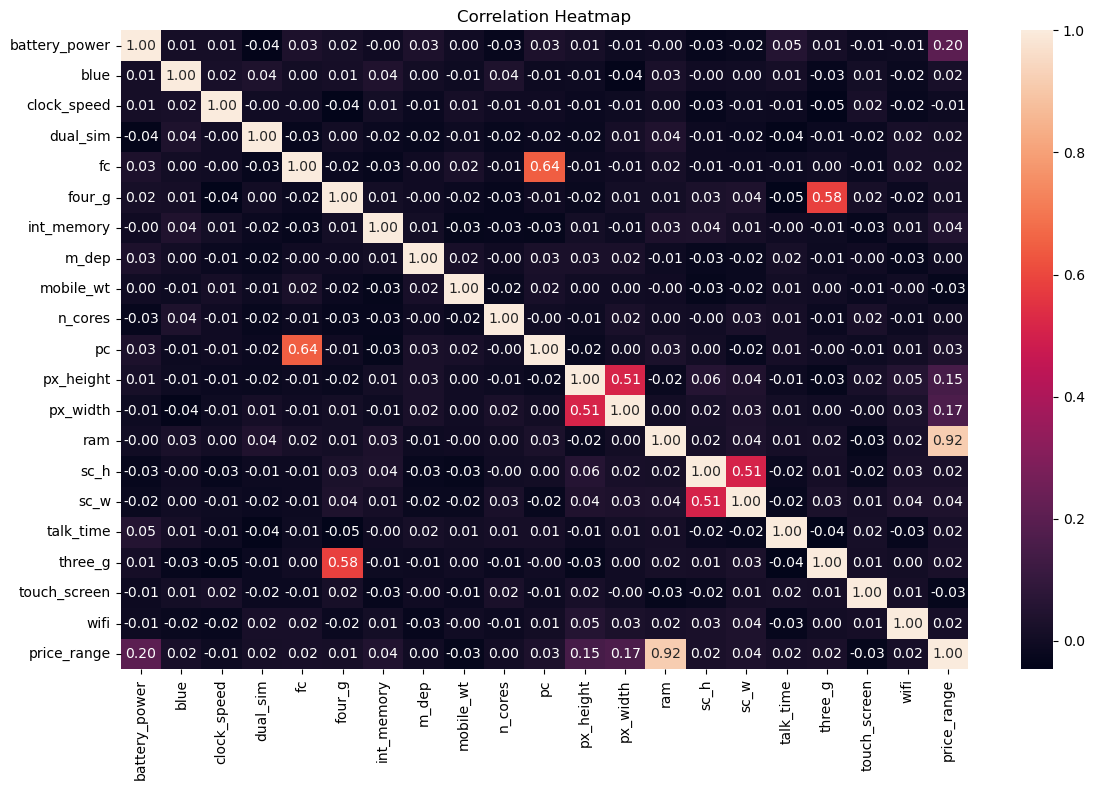

In [25]:
## check the correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f').set_title('Correlation Heatmap')
plt.tight_layout()
plt.show();

Summary
* There are a few variables that seem to have strong correlations:
1. price_range and ram --> 0.92
2. pc and fc --> 0.64
3. three_g and four_g --> 0.58

In [26]:
## variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
df_vif = add_constant(df)
pd.Series([variance_inflation_factor(df_vif.values, i) 
               for i in range(df_vif.shape[1])], 
              index=df_vif.columns)

const            98.310368
battery_power     1.502606
blue              1.011353
clock_speed       1.006977
dual_sim          1.012936
fc                1.719149
four_g            1.528514
int_memory        1.011693
m_dep             1.006467
mobile_wt         1.014087
n_cores           1.008612
pc                1.720791
px_height         1.517050
px_width          1.505883
ram              11.381971
sc_h              1.356336
sc_w              1.353668
talk_time         1.010541
three_g           1.528673
touch_screen      1.006358
wifi              1.010230
price_range      12.289686
dtype: float64

Summary
* A variance inflation factor of greater than 1 indicates the variable is likely significantly correlated with the other variables and there is thus multicollinearity.
* We can see that there are a few variables of concern:
1. price_range
2. ram
3. const

# Feature Selection
* We will setup the independent and dependent variables here. 

In [27]:
## columns
features=list(df.columns)
features

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [28]:
## y predictor variable (label) -- last feature in list
label = features.pop(-1)
label

'price_range'

In [29]:
## features (independent variables)
features

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [30]:
## split the data into features X and label/target y
x=df[features]
y=df[label]

# Train-Test Split

In [31]:
## create train-test split
X_train, X_test, y_train, y_test = train_test_split(x,y, 
                                                    test_size=0.15, 
                                                    random_state=42,
                                                    stratify=y,
                                                    shuffle=True)

In [32]:
## print shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1700, 20)
(300, 20)
(1700,)
(300,)


In [33]:
## sample of X_Train 
X_train[:5]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
574,1974,0,1.0,0,4,0,24,0.3,80,7,13,250,545,861,7,4,6,1,0,1
1018,1000,1,0.5,0,12,0,63,0.7,179,8,18,1537,1761,3744,11,1,7,0,0,1
1207,627,0,1.8,0,2,0,20,0.8,142,3,8,211,507,896,17,6,14,0,0,0
1940,1600,0,0.5,0,1,1,16,0.3,94,4,16,1315,1710,2073,9,5,4,1,1,0
515,1832,0,0.7,0,2,0,2,0.6,90,7,6,186,654,2978,18,7,18,0,0,0


In [34]:
## sample of y_train
y_train[:5]

574     0
1018    3
1207    0
1940    2
515     2
Name: price_range, dtype: int64

# Create dataframe with train and test data
* This is so we can export the data to an S3 bucket from our local machine.

In [35]:
## train dataframe
trainX = pd.DataFrame(X_train)
trainX[label] = y_train


## test dataframe
testX = pd.DataFrame(X_test)
testX[label] = y_test

In [36]:
## let see trainX
trainX.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
574,1974,0,1.0,0,4,0,24,0.3,80,7,...,250,545,861,7,4,6,1,0,1,0
1018,1000,1,0.5,0,12,0,63,0.7,179,8,...,1537,1761,3744,11,1,7,0,0,1,3
1207,627,0,1.8,0,2,0,20,0.8,142,3,...,211,507,896,17,6,14,0,0,0,0
1940,1600,0,0.5,0,1,1,16,0.3,94,4,...,1315,1710,2073,9,5,4,1,1,0,2
515,1832,0,0.7,0,2,0,2,0.6,90,7,...,186,654,2978,18,7,18,0,0,0,2


# Export Data to CSV files

In [37]:
## export to csv
trainX.to_csv("train-V-1.csv",index = False)
testX.to_csv("test-V-1.csv", index = False)

In [38]:
## view bucket name
bucket

'adamnlpbucket1'

# Send Data to S3 bucket on AWS

In [39]:
## send data to S3 --> Sagemaker will take the data for training from S3 bucket

## 1. folder name
sk_prefix="sagemaker/mobile_price_classification/sklearncontainer"

## 2. upload the data to s3 --> path, bucket, key_prefix
trainpath=sess.upload_data(path='train-V-1.csv',bucket=bucket,key_prefix=sk_prefix)
testpath=sess.upload_data(path='test-V-1.csv',bucket=bucket,key_prefix=sk_prefix)

## print the path
print(trainpath)
print(testpath)

s3://adamnlpbucket1/sagemaker/mobile_price_classification/sklearncontainer/train-V-1.csv
s3://adamnlpbucket1/sagemaker/mobile_price_classification/sklearncontainer/test-V-1.csv


# Training Script used by AWS Sagemaker
* This script is used by AWS Sagemaker to train the ML models.
* We will calle it `train_script.py`

In [60]:
%%writefile train_script.py

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
import sklearn
import joblib
import boto3
import pathlib
from io import StringIO
import argparse
import os
import numpy as np
import pandas as pd

def model_fn(model_dir):
    clf = joblib.load(os.path.join(model_dir, "model.joblib"))
    return clf

if __name__ == "__main__":
    print("[Info] Extracting arguments")
    parser = argparse.ArgumentParser()

    parser.add_argument("--n_estimators", type=int, default=100)
    parser.add_argument("--random_state", type=int, default=0)

    parser.add_argument("--model-dir", type=str, default=os.environ.get("SM_MODEL_DIR"))
    parser.add_argument("--train", type=str, default=os.environ.get("SM_CHANNEL_TRAIN"))
    parser.add_argument("--test", type=str, default=os.environ.get("SM_CHANNEL_TEST"))
    parser.add_argument("--train-file", type=str, default="train-V-1.csv")
    parser.add_argument("--test-file", type=str, default="test-V-1.csv")

    args, _ = parser.parse_known_args()

    print("SKLearn Version: ", sklearn.__version__)
    print("Joblib Version: ", joblib.__version__)

    print("[INFO] Reading data")
    train_df = pd.read_csv(os.path.join(args.train, args.train_file))
    test_df = pd.read_csv(os.path.join(args.test, args.test_file))

    features = list(train_df.columns)
    label = features.pop(-1)

    print("Building training and testing datasets")
    X_train = train_df[features]
    X_test = test_df[features]
    y_train = train_df[label]
    y_test = test_df[label]

    print('Column order: ')
    print(features)

    print("Label column is: ", label)
    
    print("Data Shape: ")
    print("---- SHAPE OF TRAINING DATA (85%) ----")
    print(X_train.shape)
    print(y_train.shape)
    print("---- SHAPE OF TESTING DATA (15%) ----")
    print(X_test.shape)
    print(y_test.shape)

    print("Training RandomForest Model ....")
    model = RandomForestClassifier(n_estimators=args.n_estimators,
                                   random_state=args.random_state,
                                   verbose=2,
                                   n_jobs=1)
    
    model.fit(X_train, y_train)

    model_path = os.path.join(args.model_dir, "model.joblib")
    joblib.dump(model, model_path)
    print("Model saved at " + model_path)

    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_rep = classification_report(y_test, y_pred_test)

    print("---- METRICS RESULTS FOR TESTING DATA ----")
    print("Total Rows are: ", X_test.shape[0])
    print('[TESTING] Model Accuracy is: ', test_acc)
    print('[TESTING] Testing Report: ')
    print(test_rep)

Overwriting train_script.py


# Entry Point To Execute the Training script on AWS SageMaker

In [ ]:
## get sagemaker arn role
import sagemaker

role = sagemaker.get_execution_role()
print(f"Using role: {role}")  # This should print the role ARN


In [64]:
from sagemaker.sklearn.estimator import SKLearn

FRAMEWORK_VERSION = "0.23-1"

sklearn_estimator = SKLearn(
    entry_point="train_script.py",
    role=role,  # get role from IAM or via code above
    instance_count=1,
    instance_type="ml.c5.xlarge",  # depends on access to CPU or GPU instances
    framework_version=FRAMEWORK_VERSION,
    base_job_name="RF-custom-sklearn",
    hyperparameters={
        "n_estimators": 100,
        "random_state": 42
    },
    output_path="s3://adamnlpbucket1/sagemaker/mobile_price_classification/model",  # Specify your S3 output path here
    use_spot_instances=True,  # train model --> then delete instance
    max_run=3600,
    max_wait=7200  # Ensure this is set when using spot instances
)

# Launch AWS Sagemaker Training Job

In [65]:
# launch training job, with asynchronous call
sklearn_estimator.fit({"train": trainpath, "test": testpath}, wait=True)

INFO:sagemaker:Creating training-job with name: RF-custom-sklearn-2025-03-07-20-37-50-537


2025-03-07 20:37:52 Starting - Starting the training job...
2025-03-07 20:38:23 Downloading - Downloading input data...
2025-03-07 20:38:38 Downloading - Downloading the training image...
2025-03-07 20:39:20 Training - Training image download completed. Training in progress.
2025-03-07 20:39:20 Uploading - Uploading generated training model2025-03-07 20:39:14,727 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2025-03-07 20:39:14,731 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-03-07 20:39:14,778 sagemaker_sklearn_container.training INFO     Invoking user training script.
2025-03-07 20:39:14,964 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-03-07 20:39:14,976 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-03-07 20:39:14,987 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2025-03-07 20:39:14

# To get the model from S3

In [67]:
sklearn_estimator.latest_training_job.wait(logs="None")

## call model artifacts
artifact = sm_boto3.describe_training_job(
    TrainingJobName=sklearn_estimator.latest_training_job.name
)["ModelArtifacts"]["S3ModelArtifacts"]


2025-03-07 20:39:33 Starting - Preparing the instances for training
2025-03-07 20:39:33 Downloading - Downloading the training image
2025-03-07 20:39:33 Training - Training image download completed. Training in progress.
2025-03-07 20:39:33 Uploading - Uploading generated training model
2025-03-07 20:39:33 Completed - Training job completed


In [68]:
artifact

's3://adamnlpbucket1/sagemaker/mobile_price_classification/model/RF-custom-sklearn-2025-03-07-20-37-50-537/output/model.tar.gz'

# Deploy Model to AWS Sagemaker Endpoint

## 1. Setup model and time

In [69]:
from sagemaker.sklearn.model import SKLearnModel
from time import gmtime,strftime

## model name + current timestamp
model_name="Custom-sklearn-model-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
## define model
model=SKLearnModel(
    name=model_name,
    model_data=artifact,
    role=role,
    entry_point="train_script.py", ## training script
    framework_version=FRAMEWORK_VERSION
)

In [70]:
model

## 2. Endpoint Deployment

In [71]:
## Endpoint deployment
endpoint_name="Custom-sklearn-model-" + strftime("%Y-%m-%d-%H-%M-%S", gmtime())
print("EndpointName={}".format(endpoint_name))

## setup predictor
predictor=model.deploy(
    initial_instance_count=1,
    instance_type="ml.m4.xlarge", ## depends on CPU vs. GPU instance access
    endpoint_name=endpoint_name

)

EndpointName=Custom-sklearn-model-2025-03-07-20-55-12


INFO:sagemaker:Creating model with name: Custom-sklearn-model-2025-03-07-20-53-16
INFO:sagemaker:Creating endpoint-config with name Custom-sklearn-model-2025-03-07-20-55-12
INFO:sagemaker:Creating endpoint with name Custom-sklearn-model-2025-03-07-20-55-12


-----!

## 3. Predict
* We can now use the predictor we setup above to make predictions on the test set.

In [73]:
## let see first 2 features
testX[features][0:2]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
906,1983,1,1.2,1,6,1,27,0.6,125,1,11,370,1197,3897,12,10,10,1,1,1
1408,1791,1,0.5,1,1,1,33,0.5,110,5,4,371,682,594,17,8,16,1,0,1


Predict `price_range`
- From above we can recall there are 0, 1, 2, 3 price ranges.

In [77]:
## utilize predictor
print(predictor.predict(testX[features][0:2].values.tolist()))

[3 0]


Summary
* So from the predictions above we can say that 

# Delete Endpoint
* This is very important so it does not stay in service.

In [78]:
sm_boto3.delete_endpoint(EndpointName=endpoint_name)

{'ResponseMetadata': {'RequestId': '68d353a4-4bac-4486-b56a-96cf549e0ba6',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': '68d353a4-4bac-4486-b56a-96cf549e0ba6',
   'content-type': 'application/x-amz-json-1.1',
   'date': 'Fri, 07 Mar 2025 21:04:55 GMT',
   'content-length': '0'},
  'RetryAttempts': 0}}